In [1]:
import os
import nn_training.optimizers as optim
import nn_training.experiment_objectives as object_fun
from math import pi

import numpy as np
import matplotlib.pyplot as plt
import nn_training.data_utils as utils
import pickle
%load_ext autoreload
%autoreload 2

np.random.seed(1)
import random
random.seed(1)

In [2]:
def experiment(name, f, func, dataset, input_size, hidden_size, iters, log_s = False):
    optimizer = optim.DiffEvolution(
        optimized_func=func,
        dataset = dataset,
        population_size = 100
    )
    experiment = optimizer.optimize(
        experiment_name = name,
        in_channels = input_size,
        n_hidden_neurons = hidden_size,
        out_channels = 1,
        f_factor = f,
        min_f_factor=0.01,
        n_iters=iters,
        best_loss_treshold=1e-3,
        probe_times=40,
        gamma=1
    )

    with open(os.path.join("results/", experiment.name + ".pickle"), "wb") as file:
        pickle.dump(experiment, file)

    min_losses = [min(i) for i in experiment.losses_per_epoch]

    x = [ i for _, i in zip(range(1000), dataset)]
    y = [ optimizer.optimized_func(i) for i in x]
    y_predicted = [ experiment.best_individual.predict(i) for i in x]

    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    ax[0].plot(range(len(experiment.losses_per_epoch)), min_losses)
    ax[0].set_title("Funkcja straty")
    ax[0].set_xlabel("Epoka / iteracja")
    ax[0].set_ylabel("Strata w skali log" if log_s else "Strata")
    ax[0].set_yscale(value='log' if log_s else 'linear')
    ax[1].scatter(x, y, color='red', label='Originalna funkcja')
    ax[1].scatter(x, y_predicted, color='blue', label='Aproksymowana funkcja')
    ax[1].legend()
    ax[1].set_xlabel("$x$")
    ax[1].set_ylabel("$Q(x)$")
    ax[1].set_title("Aproksymowana funkcja")
    plt.show()

## Polynomial

Epoch 999 loss = 37.74445931974264

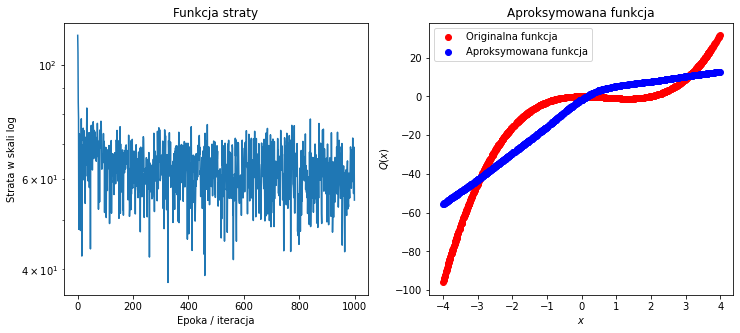

In [3]:
experiment(
    'DiffEvo-Poly-0.1', 0.1, 
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

Epoch 999 loss = 0.11024888178566661

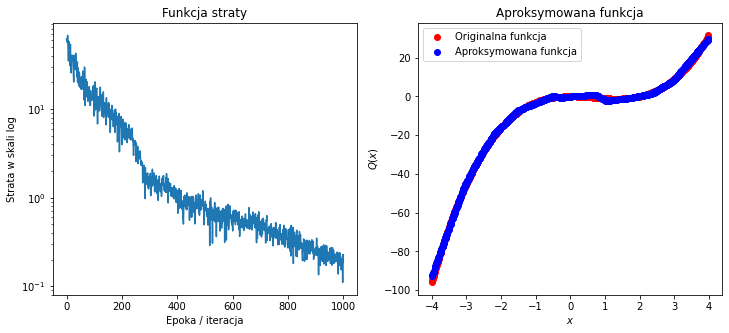

In [4]:
experiment(
    'DiffEvo-Poly-0.5', 0.5, 
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,+
    1000,
    True
)

Epoch 999 loss = 1.1539863042842584

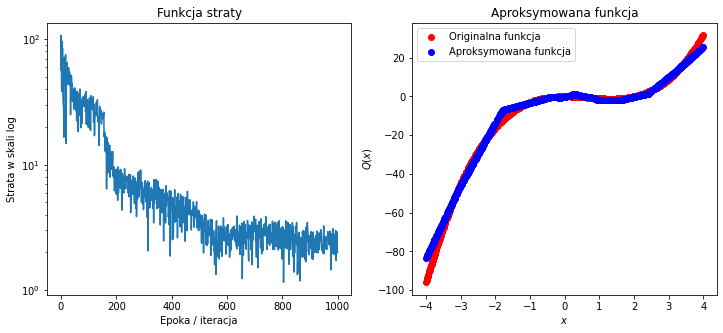

In [5]:
experiment(
    'DiffEvo-Poly-0.9', 0.9, 
    object_fun.polynomial_func, utils.UniformDistribution(1, -4, 4), 
    1,
    30,
    1000,
    True
)

## SinCos

Epoch 999 loss = 0.21447750004684804

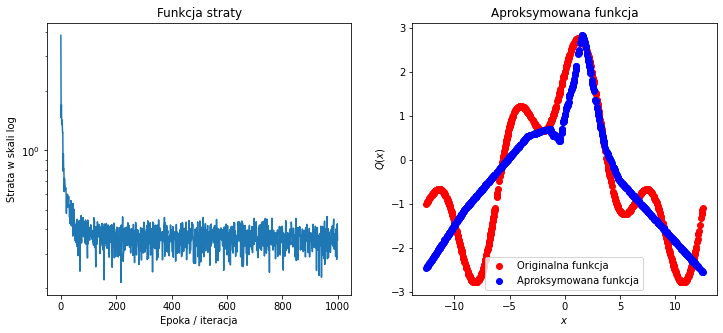

In [6]:
experiment(
    'DiffEvo-SinCos-0.1', 0.1, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 999 loss = 0.22790270787424208

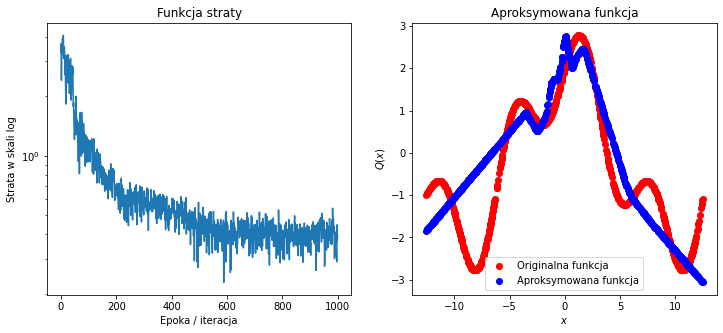

In [7]:
experiment(
    'DiffEvo-SinCos-0.5', 0.5, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

Epoch 999 loss = 0.7871269774864215

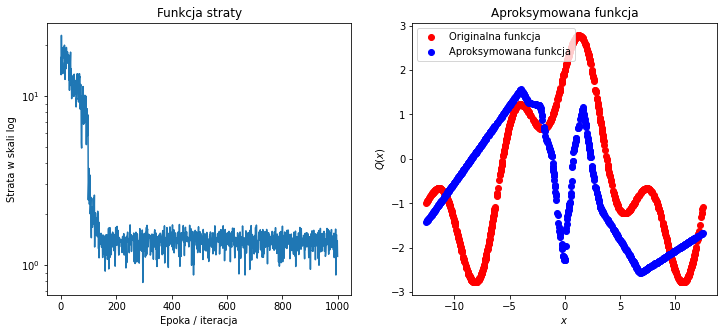

In [8]:
experiment(
    'DiffEvo-SinCos-0.9', 0.9, 
    object_fun.sinusoidal, utils.UniformDistribution(1, -4 * pi, 4 * pi), 
    1,
    30,
    1000,
    True
)

## Xor

In [9]:
def experiment(name, f, func, dataset, input_size, hidden_size, iters, log_s = False):
    optimizer = optim.DiffEvolution(
        optimized_func=func,
        dataset = dataset,
        population_size = 100
    )
    experiment = optimizer.optimize(
        experiment_name = name,
        in_channels = input_size,
        n_hidden_neurons = hidden_size,
        out_channels = 1,
        f_factor = f,
        min_f_factor=0.01,
        n_iters=iters,
        best_loss_treshold=1e-3,
        probe_times=40,
        gamma=1
    )

    with open(os.path.join("results/", experiment.name + ".pickle"), "wb") as file:
        pickle.dump(experiment, file)

    min_losses = [min(i) for i in experiment.losses_per_epoch]

    x = [ i for _, i in zip(range(1000), dataset)]
    y = [ optimizer.optimized_func(i) for i in x]
    y_predicted = [ experiment.best_individual.predict(i) for i in x]

    fig, ax = plt.subplots(1,1, figsize=(7, 5))
    ax.plot(range(len(experiment.losses_per_epoch)), min_losses)
    ax.set_title("Funkcja straty")
    ax.set_xlabel("Epoka / iteracja")
    ax.set_ylabel("Strata w skali log" if log_s else "Strata")
    ax.set_yscale(value='log' if log_s else 'linear')
    plt.show()
    for x in [ (0, 0), (0, 1), (1, 0), (1, 1) ]:
        print(f"F{x} = {experiment.best_individual.predict(np.array(x))}")

Epoch 22 loss = 0.0008275890702083129

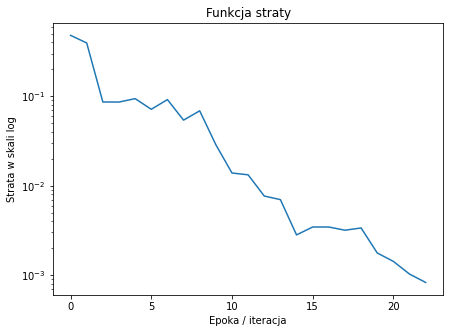

F(0, 0) = [0.00751744]
F(0, 1) = [0.99044964]
F(1, 0) = [0.93708747]
F(1, 1) = [0.00321686]


In [10]:
experiment(
    'DiffEvo-Xor-0.1', 0.1, 
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)

Epoch 113 loss = 0.0009938414137646467

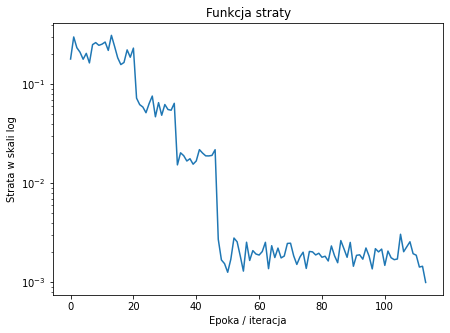

F(0, 0) = [0.02693898]
F(0, 1) = [0.91581927]
F(1, 0) = [0.98516921]
F(1, 1) = [-0.00464172]


In [11]:
experiment(
    'DiffEvo-Xor-0.5', 0.5, 
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)

Epoch 306 loss = 0.0009703014036418535

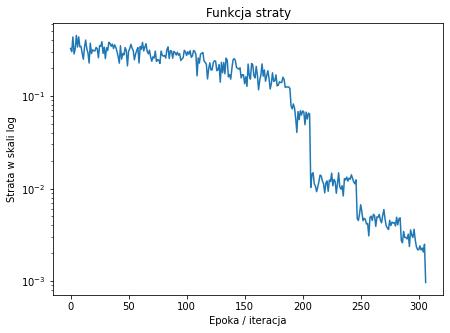

F(0, 0) = [-0.0330433]
F(0, 1) = [0.95737056]
F(1, 0) = [1.01181363]
F(1, 1) = [-0.02331412]


In [12]:
experiment(
    'DiffEvo-Xor-0.9', 0.9, 
    object_fun.xor, utils.RandintGenerator(1), 
    2,
    30,
    1000,
    True
)